In [2]:
%cd /content/drive/MyDrive/SMHRD-DL

/content/drive/MyDrive/SMHRD-DL


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.utils import image_dataset_from_directory

#### `tf.keras.applications`에서 제공하는 주요 모델
- applications Guide : https://www.tensorflow.org/api_docs/python/tf/keras/applications
- **모델명 · 설명 · ImageNet Top-1 정확도 · 파라미터 수(약)**  
- **입력 크기 224×224**(일부는 299×299) 기준  
- `include_top`, `weights`, `input_shape` 등을 조정하며, 필요에 따라 **특징 추출**, **미세 조정(fine-tuning)** 등 활용 가능  

---

### ConvNeXt 계열

- 출시 시기: 2022년 5월 (논문 발표 기준)

> 특징
> - Transformer 발전을 반영해 대형 커널 및 depth-wise conv로 설계
> - ResNet 구조를 현대화하여 단순화·고성능화 달성
> - Stage 구분과 채널 확장 비율 조정으로 성능/효율 균형 유지

> 🚩 큰 커널 사용으로 인해 메모리 소모가 증가할 수 있음.

| 모델명            | 설명                                     | Top-1 정확도 | 파라미터 수 |
|-------------------|------------------------------------------|-------------:|-----------:|
| **ConvNeXtTiny**  | 경량화된 ConvNeXt 버전, 빠른 추론 최적화  |    82.1%     |    28M    |
| **ConvNeXtSmall** | 중간 규모 모델, 성능/속도 균형 지향       |    83.1%     |    49M    |
| **ConvNeXtBase**  | 기본 모델, 논문 기준 밸런스 지점          |    83.8%     |    88M    |
| **ConvNeXtLarge** | 대형 모델, 높은 표현력                   |    84.0%     |   198M    |
| **ConvNeXtXLarge**| 초대형 모델, 최고 성능 지향               |    84.3%     |   350M    |

---

### DenseNet 계열

- 출시 시기: 2017년 3월 (CVPR 발표 기준)

> 특징
> - 각 층이 모든 이전 층의 출력을 입력으로 활용하는 Dense 연결
> - 그래디언트 흐름 개선과 파라미터 효율성 극대화
> - 비교적 적은 파라미터로 깊은 네트워크 구현 가능

> 🚩 Dense 연결로 인해 메모리 사용량 증가 가능성 존재.

| 모델명             | 설명                         | Top-1 정확도 | 파라미터 수 |
|--------------------|------------------------------|-------------:|-----------:|
| **DenseNet121**    | 121층, 각 블록 간 Dense 연결 |    74.0%     |     8M    |
| **DenseNet169**    | 169층, 더 깊은 연결망         |    75.3%     |    14M    |
| **DenseNet201**    | 201층, 최고 깊이 모델         |    77.0%     |    20M    |

---

### EfficientNet 계열

- 출시 시기: 2019년 5월 (ICML 발표 기준)

> 특징
> - depth, width, resolution을 균형 있게 확장하는 Compound Scaling
> - 작은 모델부터 대형 모델까지 일관된 설계 철학
> - 뛰어난 효율성과 성능을 동시에 달성

> 🚩 Compound Scaling 시 모델 크기 증가로 연산량이 크게 증가할 수 있음.

| 모델명           | 설명                           | Top-1 정확도 | 파라미터 수 |
|------------------|--------------------------------|-------------:|-----------:|
| **EfficientNetB0** | Baseline (작은 크기)          |    77.1%     |    5.3M   |
| **EfficientNetB1** | 중간 크기 ↑                   |    79.1%     |    7.8M   |
| **EfficientNetB2** | 추가 확장, 성능 향상 ↑        |    80.1%     |    9.2M   |
| **EfficientNetB3** | B2 대비 더 깊고 넓음          |    81.6%     |   12.0M   |
| **EfficientNetB4** | 고성능 추구, 크기↑            |    82.9%     |   19.0M   |
| **EfficientNetB5** | B4 대비 깊이 ↑                |    83.6%     |   30.0M   |
| **EfficientNetB6** | 더 큰 모델, 최고급 성능 지향  |    84.0%     |   43.0M   |
| **EfficientNetB7** | 최상위 모델                   |    84.3%     |   66.0M   |

---

### EfficientNetV2 계열
- 출시 시기: 2021년 6월 (ICLR 발표 기준)

> 특징
> - 초기 레이어에 Fused-MBConv 블록 도입해 빠른 학습 달성
> - Improved scaling strategy로 훈련/추론 속도 향상
> - Fused-MBConv 블록은 성능 향상을 위해 모델의 초기 레이어에 주로 배치됨

> 🚩 초기 Fused-MBConv 블록 사용으로 연산 최적화, 효율성 향상.

| 모델명             | 설명                             | Top-1 정확도 | 파라미터 수 |
|--------------------|----------------------------------|-------------:|-----------:|
| **EfficientNetV2B0** | V2 초기 모델                   |    82.3%     |    8.0M   |
| **EfficientNetV2B1** | B0 대비 확장                   |    83.4%     |    9.0M   |
| **EfficientNetV2B2** | 더 깊고 넓어진 구조            |    83.7%     |    9.1M   |
| **EfficientNetV2B3** | B2 대비 성능↑                  |    84.3%     |   11.0M   |
| **EfficientNetV2S**  | Small 버전, 속도 최적화        |    83.3%     |   22.1M   |
| **EfficientNetV2M**  | Medium, 밸런스 모델            |    85.1%     |   54.4M   |
| **EfficientNetV2L**  | Large, 고성능 모델             |    85.6%     |   88.0M   |

---

### Inception 계열

- 출시 시기: 2015~2017년

> 특징
> - 다양한 크기 필터를 병렬 결합 (Inception)
> - Depthwise Separable Conv로 연산 효율화 (Xception)

| 모델명                  | 설명                                       | Top-1 정확도 | 파라미터 수 |
|-------------------------|--------------------------------------------|-------------:|-----------:|
| **InceptionV3**         | 모듈화된 병렬 컨볼루션 블록                 |    77.9%     |   23.9M   |
| **Xception**            | Depthwise Separable Conv를 확장 적용        |    79.0%     |   22.9M   |

---

### ResNet 계열
- 출시 시기: 2015~2016년

> 특징
> - 스킵 연결(residual connection)으로 매우 깊은 네트워크 학습 가능  
> - V2는 BatchNorm→Activation 순서 개선  
> - 다양한 깊이(50/101/152)로 모델 선택 용이

| 모델명               | 설명                                          | Top-1 정확도 | 파라미터 수 |
|----------------------|-----------------------------------------------|-------------:|-----------:|
| **ResNet50**         | 50층, 기본 스킵 연결                           |    76.0%     |   25.6M   |
| **ResNet101**        | 101층, 더 깊은 구조                           |    77.0%     |   44.6M   |
| **ResNet152**        | 152층, 최고 깊이                              |    77.6%     |   60.2M   |
| **ResNet50V2**       | 개선된 BatchNorm 이후 활성화 순서             |    77.0%     |   25.6M   |
| **ResNet101V2**      | V2 방식으로 확장                             |    77.9%     |   44.5M   |
| **ResNet152V2**      | V2 방식 최고 깊이                            |    78.0%     |   60.2M   |

---

### VGG 계열

- 출시 시기: 2014년 9월
> **특징**  
> - 연속된 3×3 컨볼루션 블록으로 단순하지만 깊은 구조  
> - 매우 큰 파라미터 수로 메모리 사용량 높음  
> - 초기 CNN 연구의 기준 모델

| 모델명    | 설명                    | Top-1 정확도 | 파라미터 수 |
|-----------|-------------------------|-------------:|-----------:|
| **VGG16** | 16층, 연속 3×3 Conv 사용 |    71.5%     |  138.4M   |
| **VGG19** | 19층, 더 깊어진 버전     |    71.3%     |  143.7M   |

---

### MobileNet 계열
- **특징**  
  - Depthwise Separable Convolution으로 경량화  
  - 낮은 연산량으로 모바일/엣지 환경에 최적  
  - V2는 Inverted Residual, V3는 NAS로 구조 탐색

| 모델명               | 설명                                      | Top-1 정확도 | 파라미터 수 |
|----------------------|-------------------------------------------|-------------:|-----------:|
| **MobileNet**        | Depthwise Separable Conv 기반 경량화 모델 |    70.6%     |    4.2M   |
| **MobileNetV2**      | Inverted Residual + Linear Bottleneck      |    71.8%     |    3.4M   |
| **MobileNetV3Small** | NAS로 설계한 초경량 Small 버전             |    62.3%     |    1.6M   |
| **MobileNetV3Large** | NAS 설계한 고성능 Large 버전               |    75.2%     |    5.4M   |

---

### NASNet 계열
- **특징**  
  - Neural Architecture Search(NAS)로 자동 설계  
  - Mobile/Large 두 가지 용도별 모델 제공  
  - 연산 효율과 성능 최적화 간 균형 지향

| 모델명               | 설명                                      | Top-1 정확도 | 파라미터 수 |
|----------------------|-------------------------------------------|-------------:|-----------:|
| **NASNetMobile**     | Mobile 환경용 NAS 설계                     |    74.0%     |    5.3M   |
| **NASNetLarge**      | 고성능 서버용 NAS 설계                     |    82.7%     |   88.9M   |

---

### npz 데이터 로딩
- 압축된 형식의 배열로 저장
- 대용량 데이터를 압축 형태로 정리해두면 클라우드 환경에서 쉽게 업로드, 다운로드가 가능(관리 편함)
- 저장소 공간을 적게 차지(공간 효율이 좋음)

In [4]:
data = np.load('./data/brain_tumor_data.npz')
len(data)

5

In [4]:
print(data['DESC'])

[brain_tumor_dataset] 24.01.22 created by sjy, data from kaggle
                    name of classes:
                    - [0-'glioma_tumor', 1- 'meningioma_tumor', 2- 'no_tumor',3- 'pituitary_tumor']
                    - glioma tumor 신경교종: 뇌와 척수의 내부에 있는 신경교세포에서 기원하는 종양
                    - meningioma tumor 뇌수막종: 뇌를 둘러싸고 있는 지주막 세포에서 기원하는 종양
                    - no_tumor 종양x
                    - pituitary adenoma 뇌하수체 종양: 뇌 조직 중 호르몬 분비를 담당하는 뇌하수체에 발생하는 모든 양성 종양

                    data info
                    - X_train2: (2870, 224, 224, 3)
                    - y_train2: (2870, 4)
                    - X_test2: (394, 224, 224, 3)
                    - y_test2: (394, 4)
                    


In [5]:
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2870, 224, 224, 3) (394, 224, 224, 3) (2870, 4) (394, 4)


In [6]:
image_prepro = EfficientNetV2S(include_top=False,
                               weights='imagenet',
                               input_shape=(224, 224, 3),
                               pooling = 'max'
                               )
image_prepro.summary()

82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "efficientnetv2-s"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        648 │ rescaling[0][0]   │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │         96 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      5,184 │ stem_activation[… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         96 │ block1a_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, 112, 112,  │          0 │ block1a_project_… │
│                     │ 24)               │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 112, 112,  │      5,184 │ block1a_add[0][0] │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 112, 112,  │         96 │ block1b_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 112, 112,  │          0 │ block1b_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 112, 112,  │          0 │ block1b_project_… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 112, 112,  │          0 │ block1b_drop[0][… │
│                     │ 24)               │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 56, 56,    │     20,736 │ block1b_add[0][0] │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 56, 56,    │        384 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 56, 56,    │          0 │ block2a_expand_b

 Total params: 20,331,360 (77.56 MB)

 Trainable params: 20,177,488 (76.97 MB)

 Non-trainable params: 153,872 (601.06 KB)

In [7]:
!pip install pydot

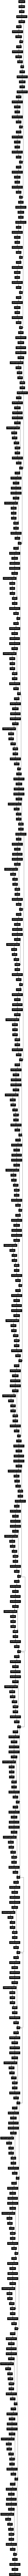

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(image_prepro)

###  모델 학습 및 평가

#### 1. 특성 추출부 방식 설정

In [9]:
tumor_model = Sequential()

#### 2. 특성 추출부

In [10]:
tumor_model.add(image_prepro)

#### 3. 분류부(MLP)

In [11]:
tumor_model.add(Flatten())
tumor_model.add(Dense(2048, activation='relu'))
tumor_model.add(Dense(1024, activation='relu'))
tumor_model.add(Dense(512, activation='relu'))
tumor_model.add(Dropout(0.2))

#### 4. 출력층

In [12]:
tumor_model.add(Dense(4, activation='softmax'))
tumor_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-s (Functional)   │ (None, 1280)           │    20,331,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     2,623,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,579,876 (97.58 MB)

 Trainable params: 25,426,004 (96.99 MB)

 Non-trainable params: 153,872 (601.06 KB)

#### 5. Compile(다중분류)
- 다중분류인 경우 -> loss = sparse_categorical_crossentropy

In [13]:
tumor_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'],
                    )

#### 6. 과대적합 제어하기 위한 콜백함수(조기학습 중단)

In [14]:
early = EarlyStopping(monitor = 'val_accuracy', patience = 5, verbose = 1)

#### 7. 학습

In [16]:
h = tumor_model.fit(X_train,
                    y_train,
                    validation_split = 0.2,
                    epochs = 150,
                    callbacks = [early],
                    batch_size = 32
                    )

Epoch 1/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.4535 - loss: 4.0812 - val_accuracy: 0.8258 - val_loss: 0.4953
Epoch 2/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.8747 - loss: 0.3511 - val_accuracy: 0.9077 - val_loss: 0.3200
Epoch 3/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9111 - loss: 0.2649 - val_accuracy: 0.9338 - val_loss: 0.2379
Epoch 4/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9595 - loss: 0.1561 - val_accuracy: 0.9443 - val_loss: 0.2116
Epoch 5/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9752 - loss: 0.1075 - val_accuracy: 0.8885 - val_loss: 0.4354
Epoch 6/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9487 - loss: 0.1540 - val_accuracy: 0.9477 - val_loss: 0.1661
Epoch 7/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9794 - loss: 0.0829 - val_accuracy: 0.9425 - val_loss: 0.2031
Epoch 8/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9770 - loss: 0.0766 - val_accuracy: 0.

#### 8. 예측

In [17]:
tumor_model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step


array([[9.9999940e-01, 9.9308096e-08, 4.3966304e-07, 1.3920842e-08],
       [4.8817857e-03, 3.1075887e-03, 9.9020821e-01, 1.8024775e-03],
       [4.2476401e-02, 4.0438619e-01, 5.4253250e-01, 1.0604893e-02],
       ...,
       [6.1274084e-05, 9.9983764e-01, 9.4895011e-05, 6.1425239e-06],
       [5.8394658e-06, 9.9995577e-01, 3.8059581e-05, 3.1812803e-07],
       [1.4716664e-03, 8.3915901e-04, 9.9682605e-01, 8.6309115e-04]],
      dtype=float32)

#### 9. 평가

In [18]:
tumor_model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 391ms/step - accuracy: 0.7127 - loss: 1.3645


[1.3719711303710938, 0.720812201499939]